<a href="https://colab.research.google.com/github/Lambru99/Fashion_MNIST_CNN/blob/main/Definitivo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import tensorflow as tf


import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [54]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape le immagini in modo da avere una dimensione aggiuntiva per il canale di colore (in questo caso 1, scala di grigi)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converti le etichette in formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [55]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

CNN

In [56]:
model = tf.keras.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool1'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool2'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout2'))

# Flatten and dense layers
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='dense1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout3'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense2'))


In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 14, 14, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        8224      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 dropout2 (Dropout)          (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)             

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [59]:
cnn_results = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 9ms/step - loss: 0.5974 - accuracy: 0.7815 - val_loss: 0.3834 - val_accuracy: 0.8602
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4199 - accuracy: 0.8475 - val_loss: 0.3364 - val_accuracy: 0.8733
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3736 - accuracy: 0.8638 - val_loss: 0.2964 - val_accuracy: 0.8916
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3468 - accuracy: 0.8730 - val_loss: 0.2831 - val_accuracy: 0.8947
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3290 - accuracy: 0.8790 - val_loss: 0.2830 - val_accuracy: 0.8976
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3135 - accuracy: 0.8839 - val_loss: 0.2648 - val_accuracy: 0.8996
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3016 - accuracy: 0.8894 - val_loss: 0.2528 - val_accurac

In [60]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.907800018787384


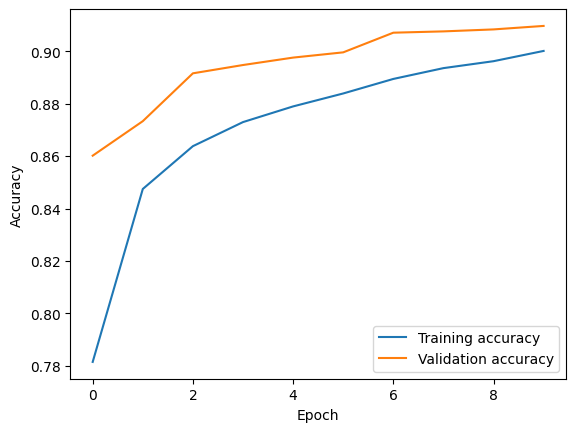

In [61]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


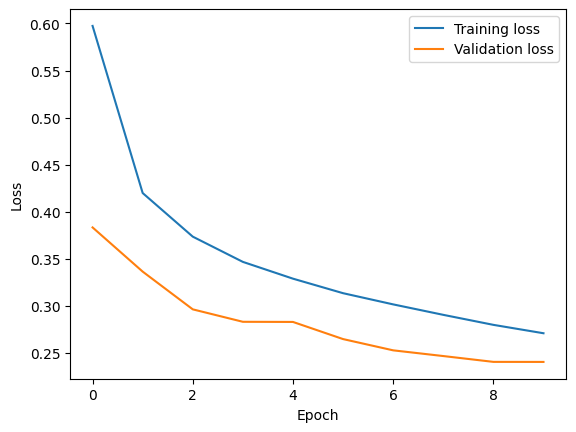

In [62]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## confusion matrix

313/313 [==============================] - 1s 2ms/step


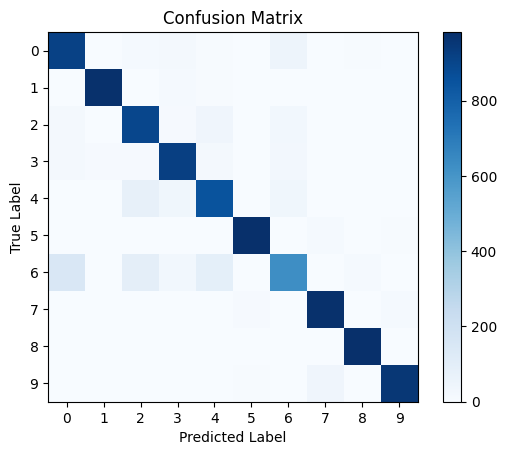

[[915   0  12  17   4   1  47   0   4   0]
 [  0 978   0  13   4   0   3   0   2   0]
 [ 23   1 896  10  42   0  27   0   1   0]
 [ 18   8   8 921  17   0  26   0   2   0]
 [  1   0  77  37 850   0  35   0   0   0]
 [  0   0   0   0   0 980   0  15   0   5]
 [147   0  94  27  92   0 628   0  12   0]
 [  0   0   0   0   0  10   0 975   0  15]
 [  2   2   1   3   3   1   2   3 982   1]
 [  0   0   1   0   0   6   0  40   0 953]]


In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(confusion_mtx)


##Linear readout

In [64]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [65]:
#conv1_output = get_hidden_representation("conv1")
conv2_output = get_hidden_representation("conv2")
dense_output = get_hidden_representation("dense1")

1875/1875 [==============================] - 3s 2ms/step


In [66]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(14, 14, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history = linear_model.fit(conv2_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4368 - accuracy: 0.8700 - val_loss: 0.3034 - val_accuracy: 0.8978
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2654 - accuracy: 0.9096 - val_loss: 0.2634 - val_accuracy: 0.9100
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2303 - accuracy: 0.9217 - val_loss: 0.2487 - val_accuracy: 0.9153
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2097 - accuracy: 0.9285 - val_loss: 0.2424 - val_accuracy: 0.9155
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1940 - accuracy: 0.9339 - val_loss: 0.2361 - val_accuracy: 0.9174
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1825 - accuracy: 0.9380 - val_loss: 0.2312 - val_accuracy: 0.9175
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1725 - accuracy: 0.9416 - val_loss: 0.2291 - val_accuracy: 0.9179
Epoch 

In [68]:
# valuta il modello sul set di test
score_conv2 = linear_model.evaluate(conv2_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_conv2[1])


 Test accuracy of the linear model with conv2 input: 0.9444666504859924


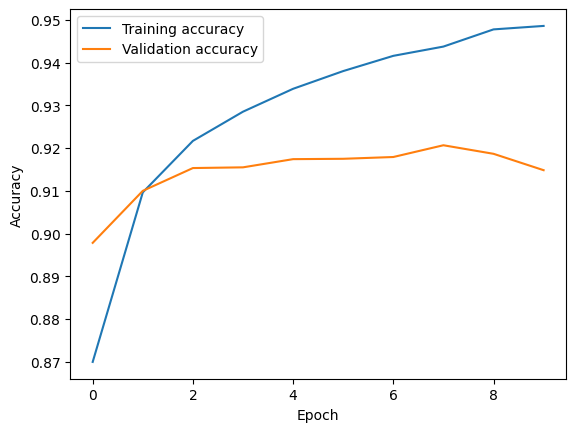

In [69]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


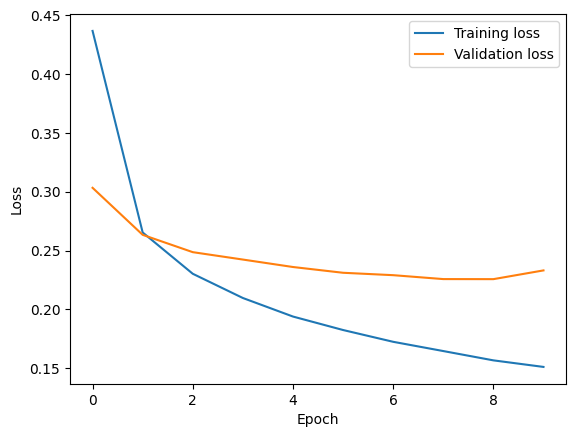

In [70]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [71]:
linear_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
hystory2=linear_model2.fit(dense_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3678 - accuracy: 0.8888 - val_loss: 0.2460 - val_accuracy: 0.9103
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1956 - accuracy: 0.9292 - val_loss: 0.2332 - val_accuracy: 0.9140
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1828 - accuracy: 0.9324 - val_loss: 0.2302 - val_accuracy: 0.9150
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1759 - accuracy: 0.9347 - val_loss: 0.2286 - val_accuracy: 0.9157
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1718 - accuracy: 0.9354 - val_loss: 0.2267 - val_accuracy: 0.9159
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1686 - accuracy: 0.9375 - val_loss: 0.2271 - val_accuracy: 0.9156
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1662 - accuracy: 0.9382 - val_loss: 0.2266 - val_accuracy: 0.9177
Epoch 

In [73]:
# valuta il modello sul set di test
score_dense = linear_model2.evaluate(dense_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_dense[1])


 Test accuracy of the linear model with conv2 input: 0.9363833069801331


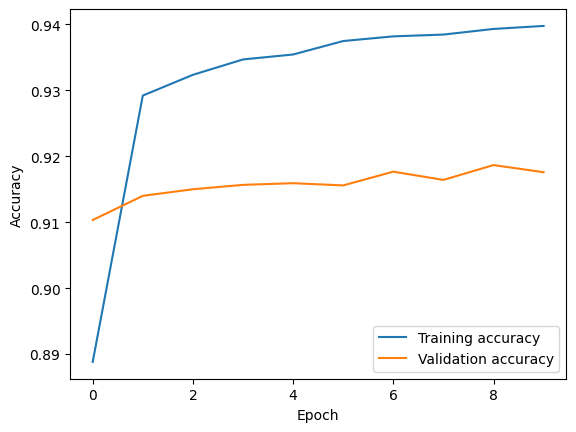

In [74]:
# Get training and validation accuracy
train_acc2 = hystory2.history['accuracy']
val_acc2 = hystory2.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc2, label='Training accuracy')
plt.plot(val_acc2, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()

## Feature Visualization Method

In [75]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


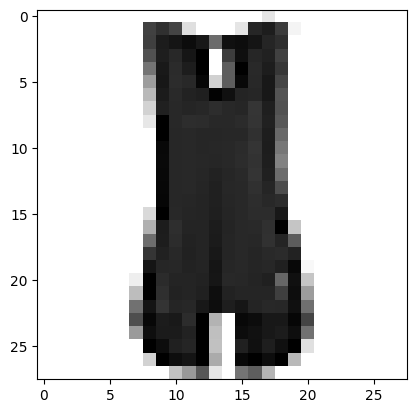

LABEL: T-shirt/top
conv1 (1, 28, 28, 64) 


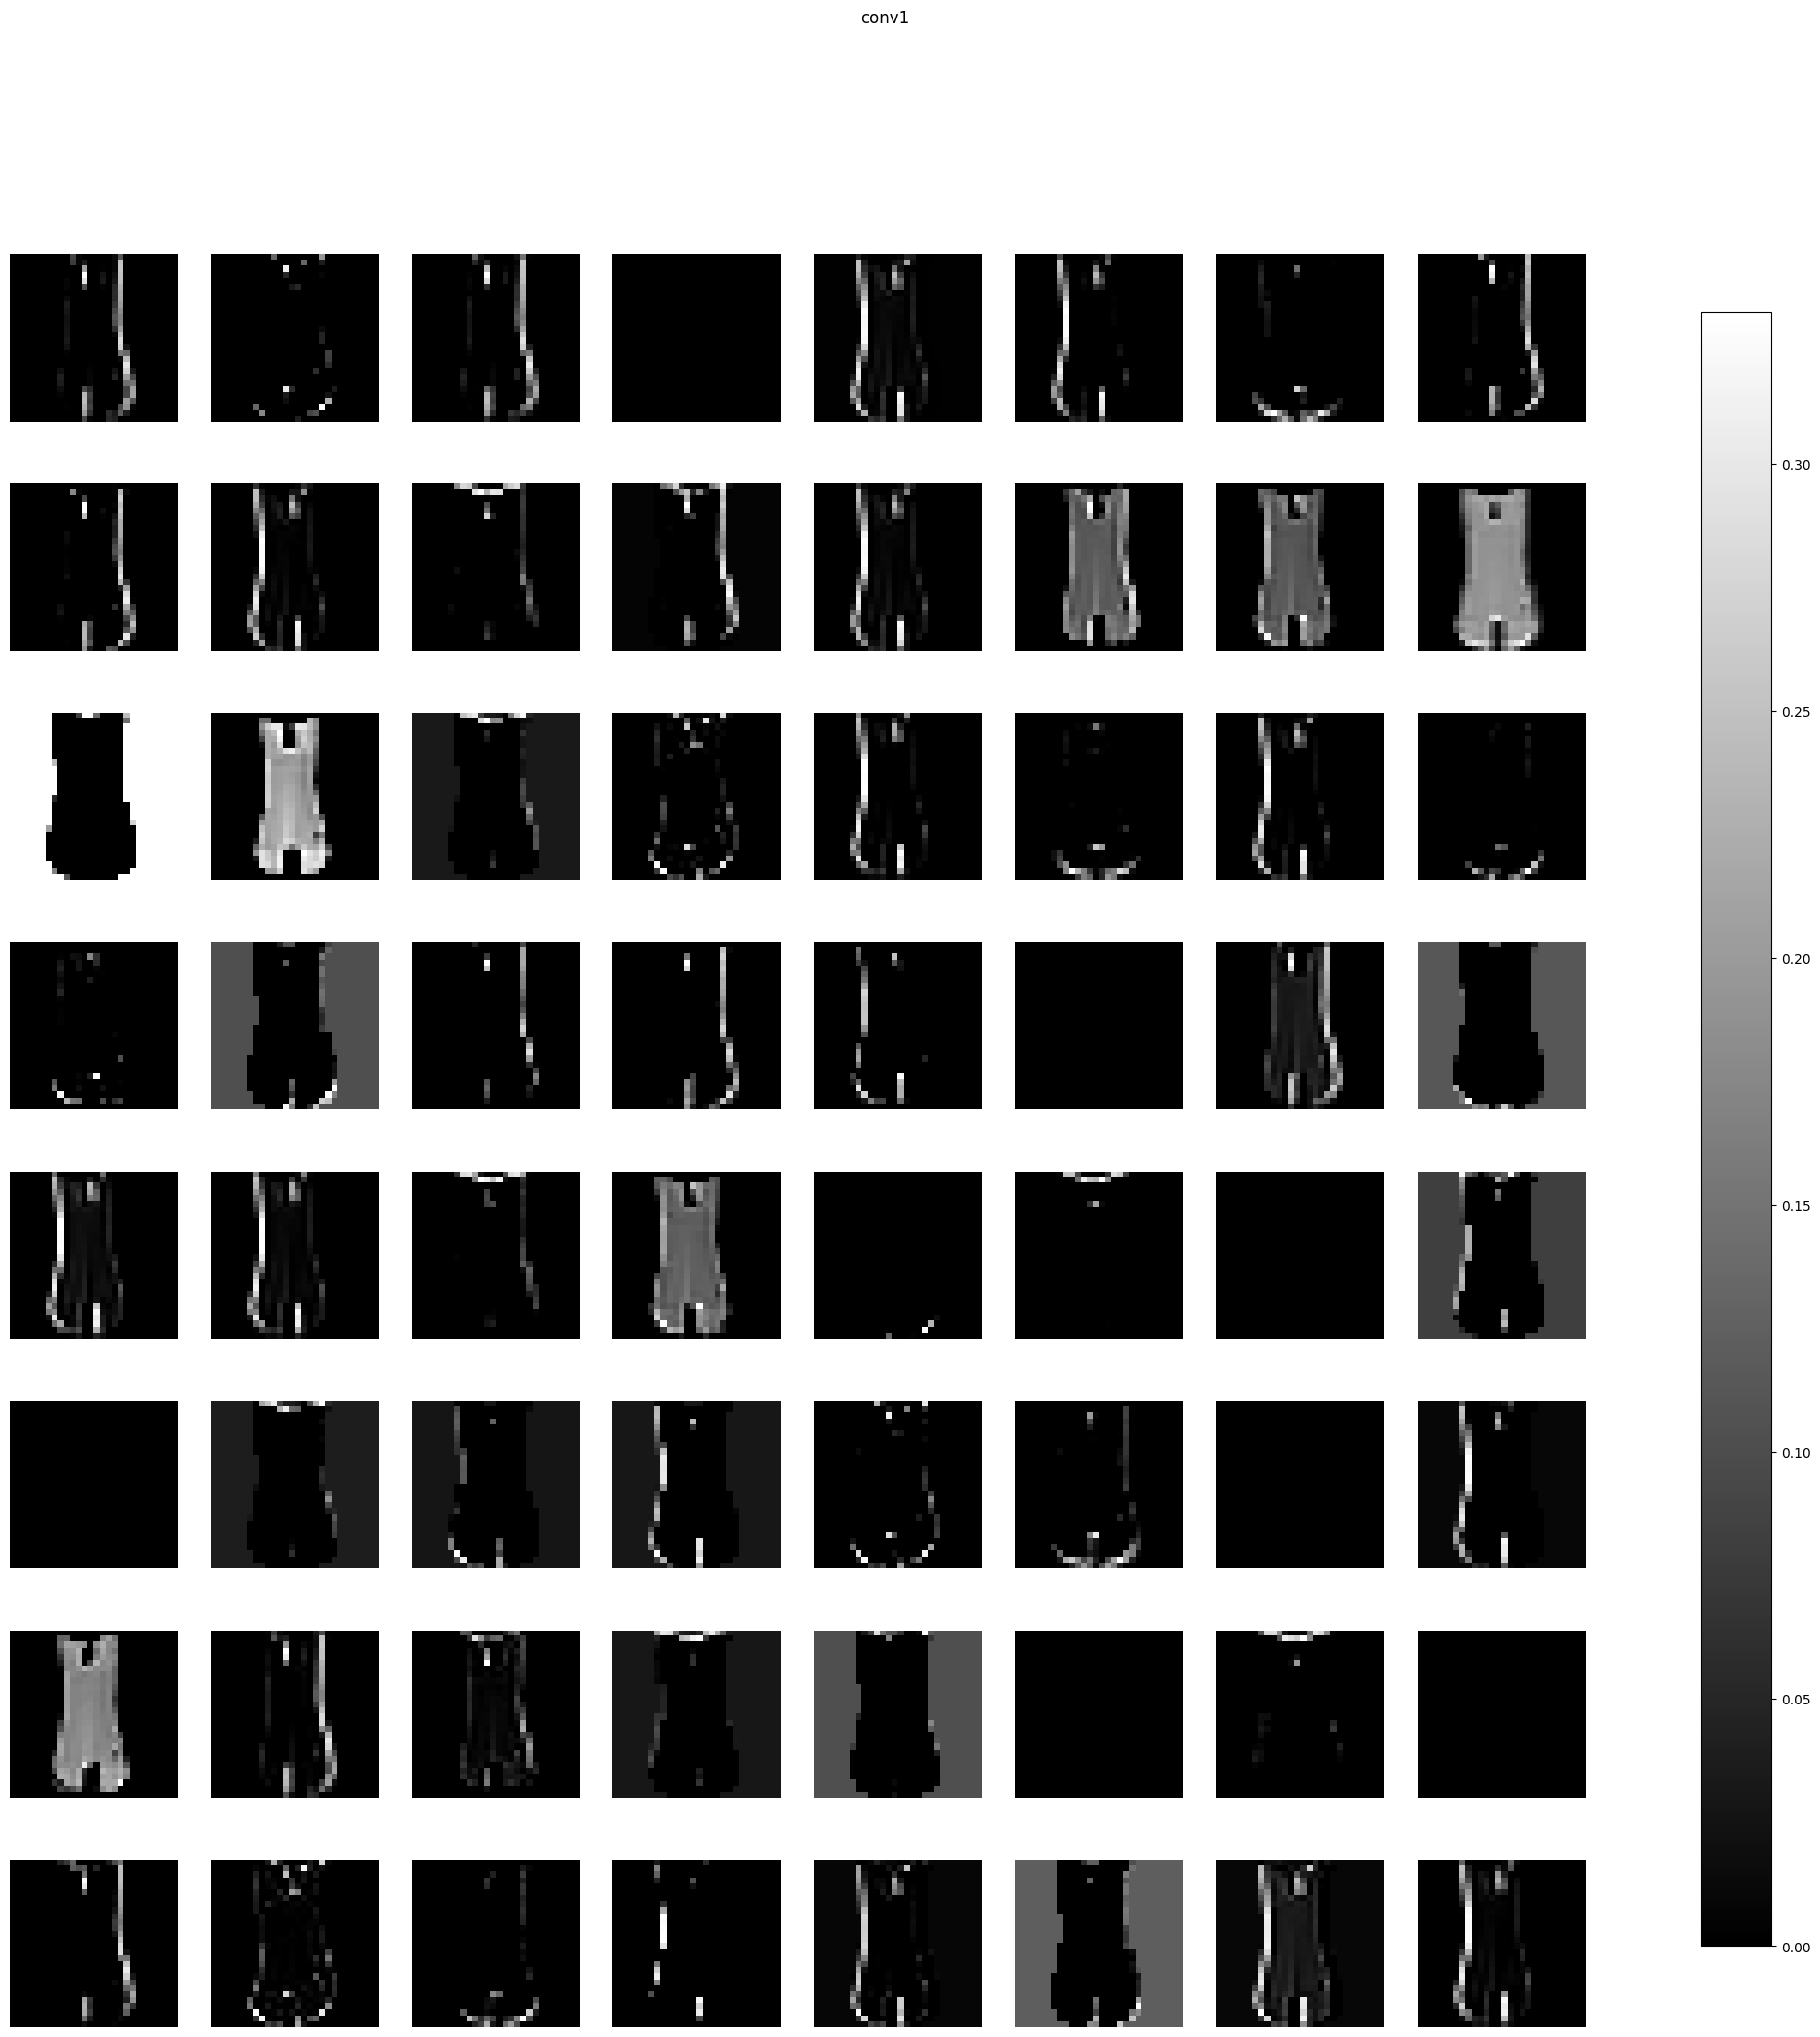

conv2 (1, 14, 14, 32) 


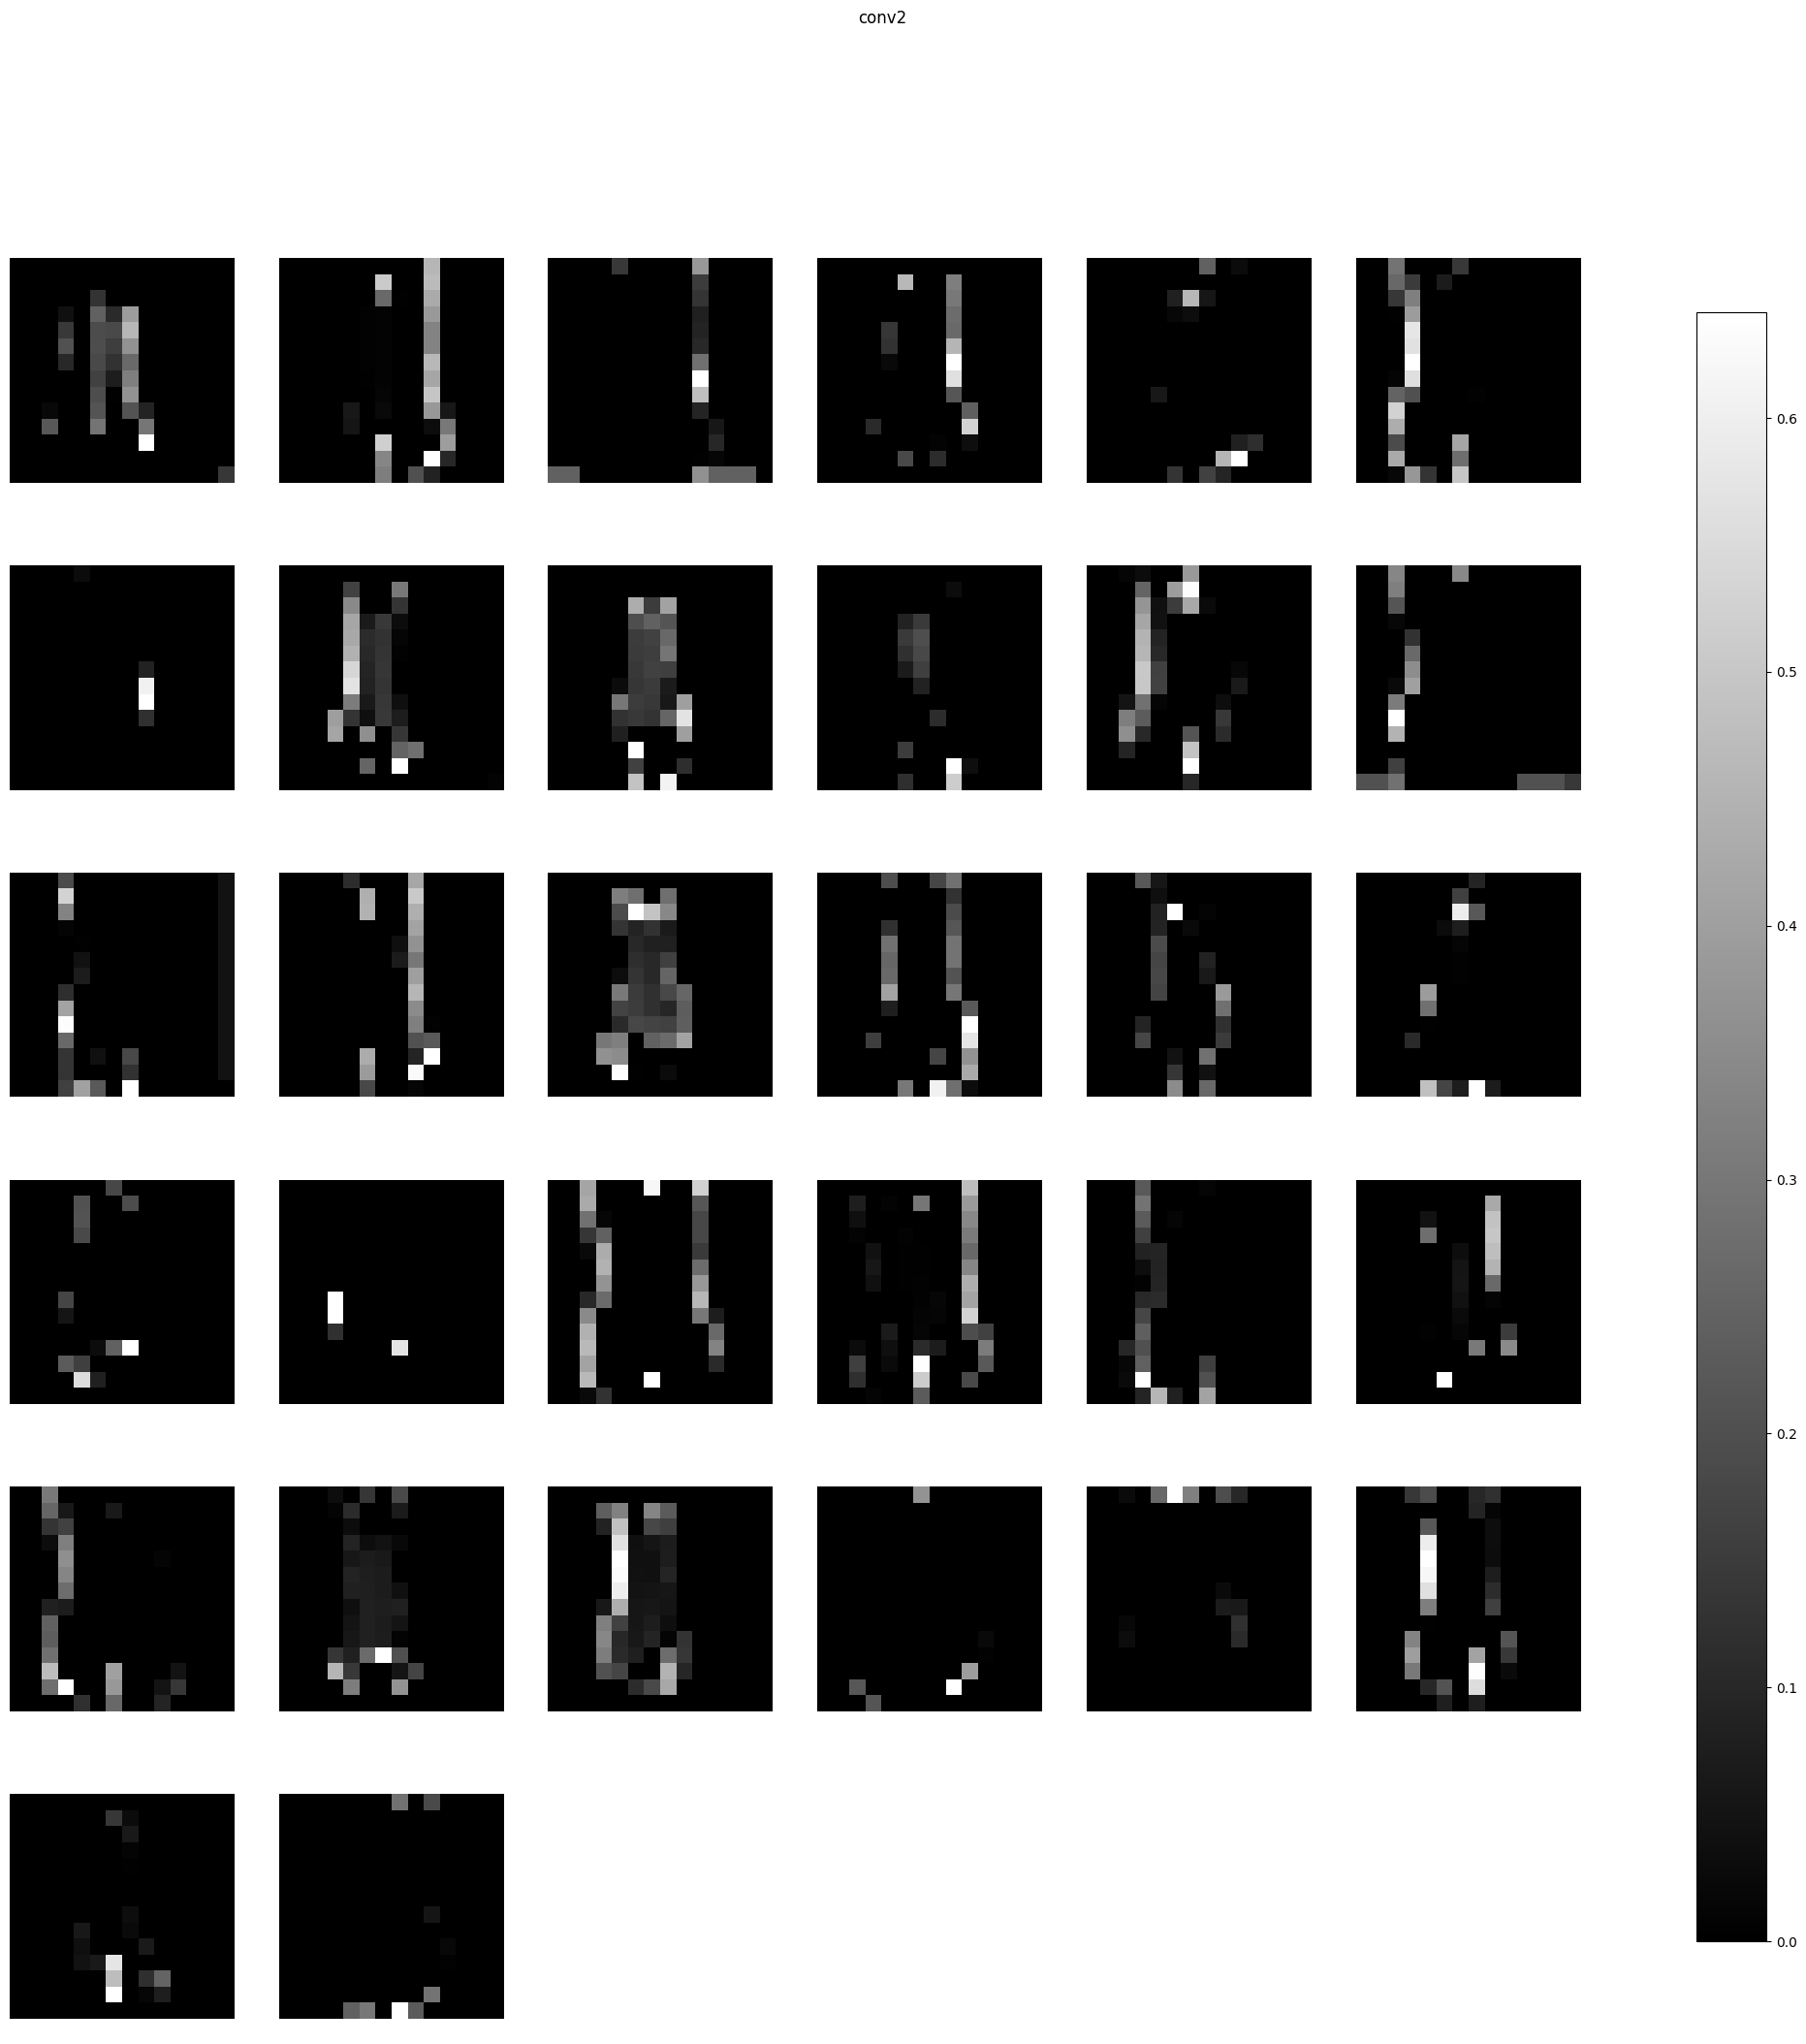

dense1 (1, 256) 


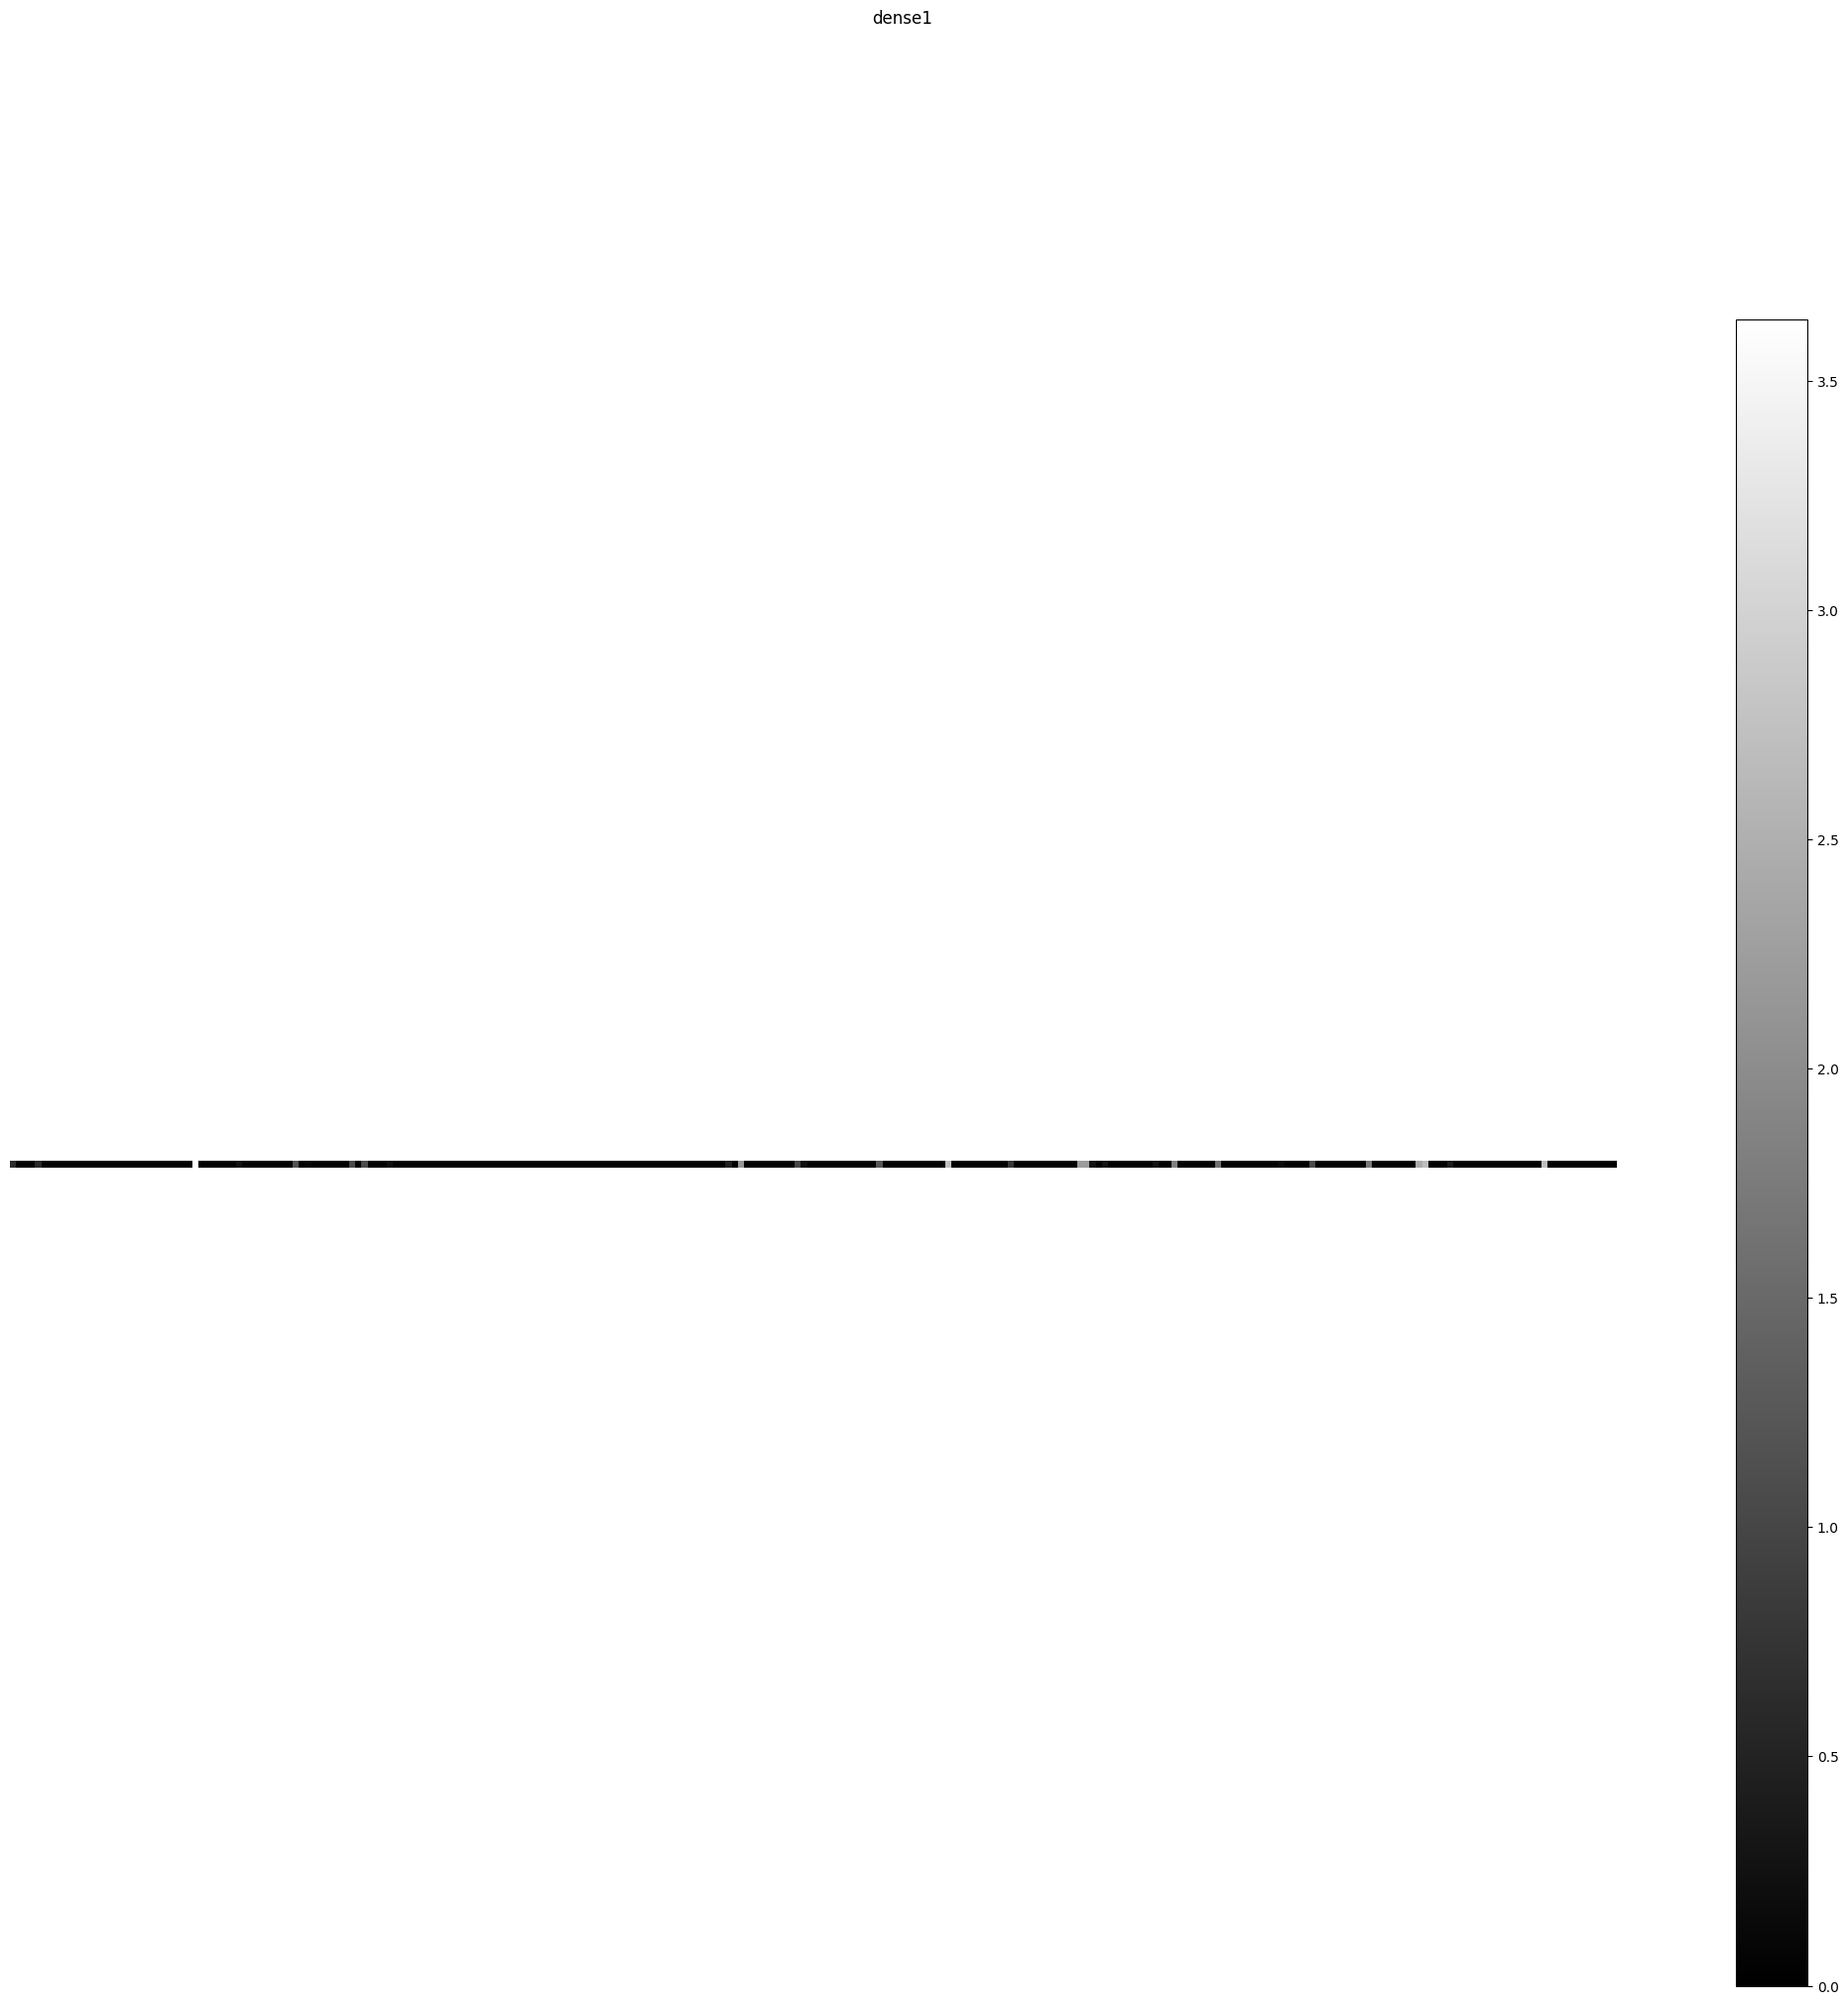

dense2 (1, 10) 


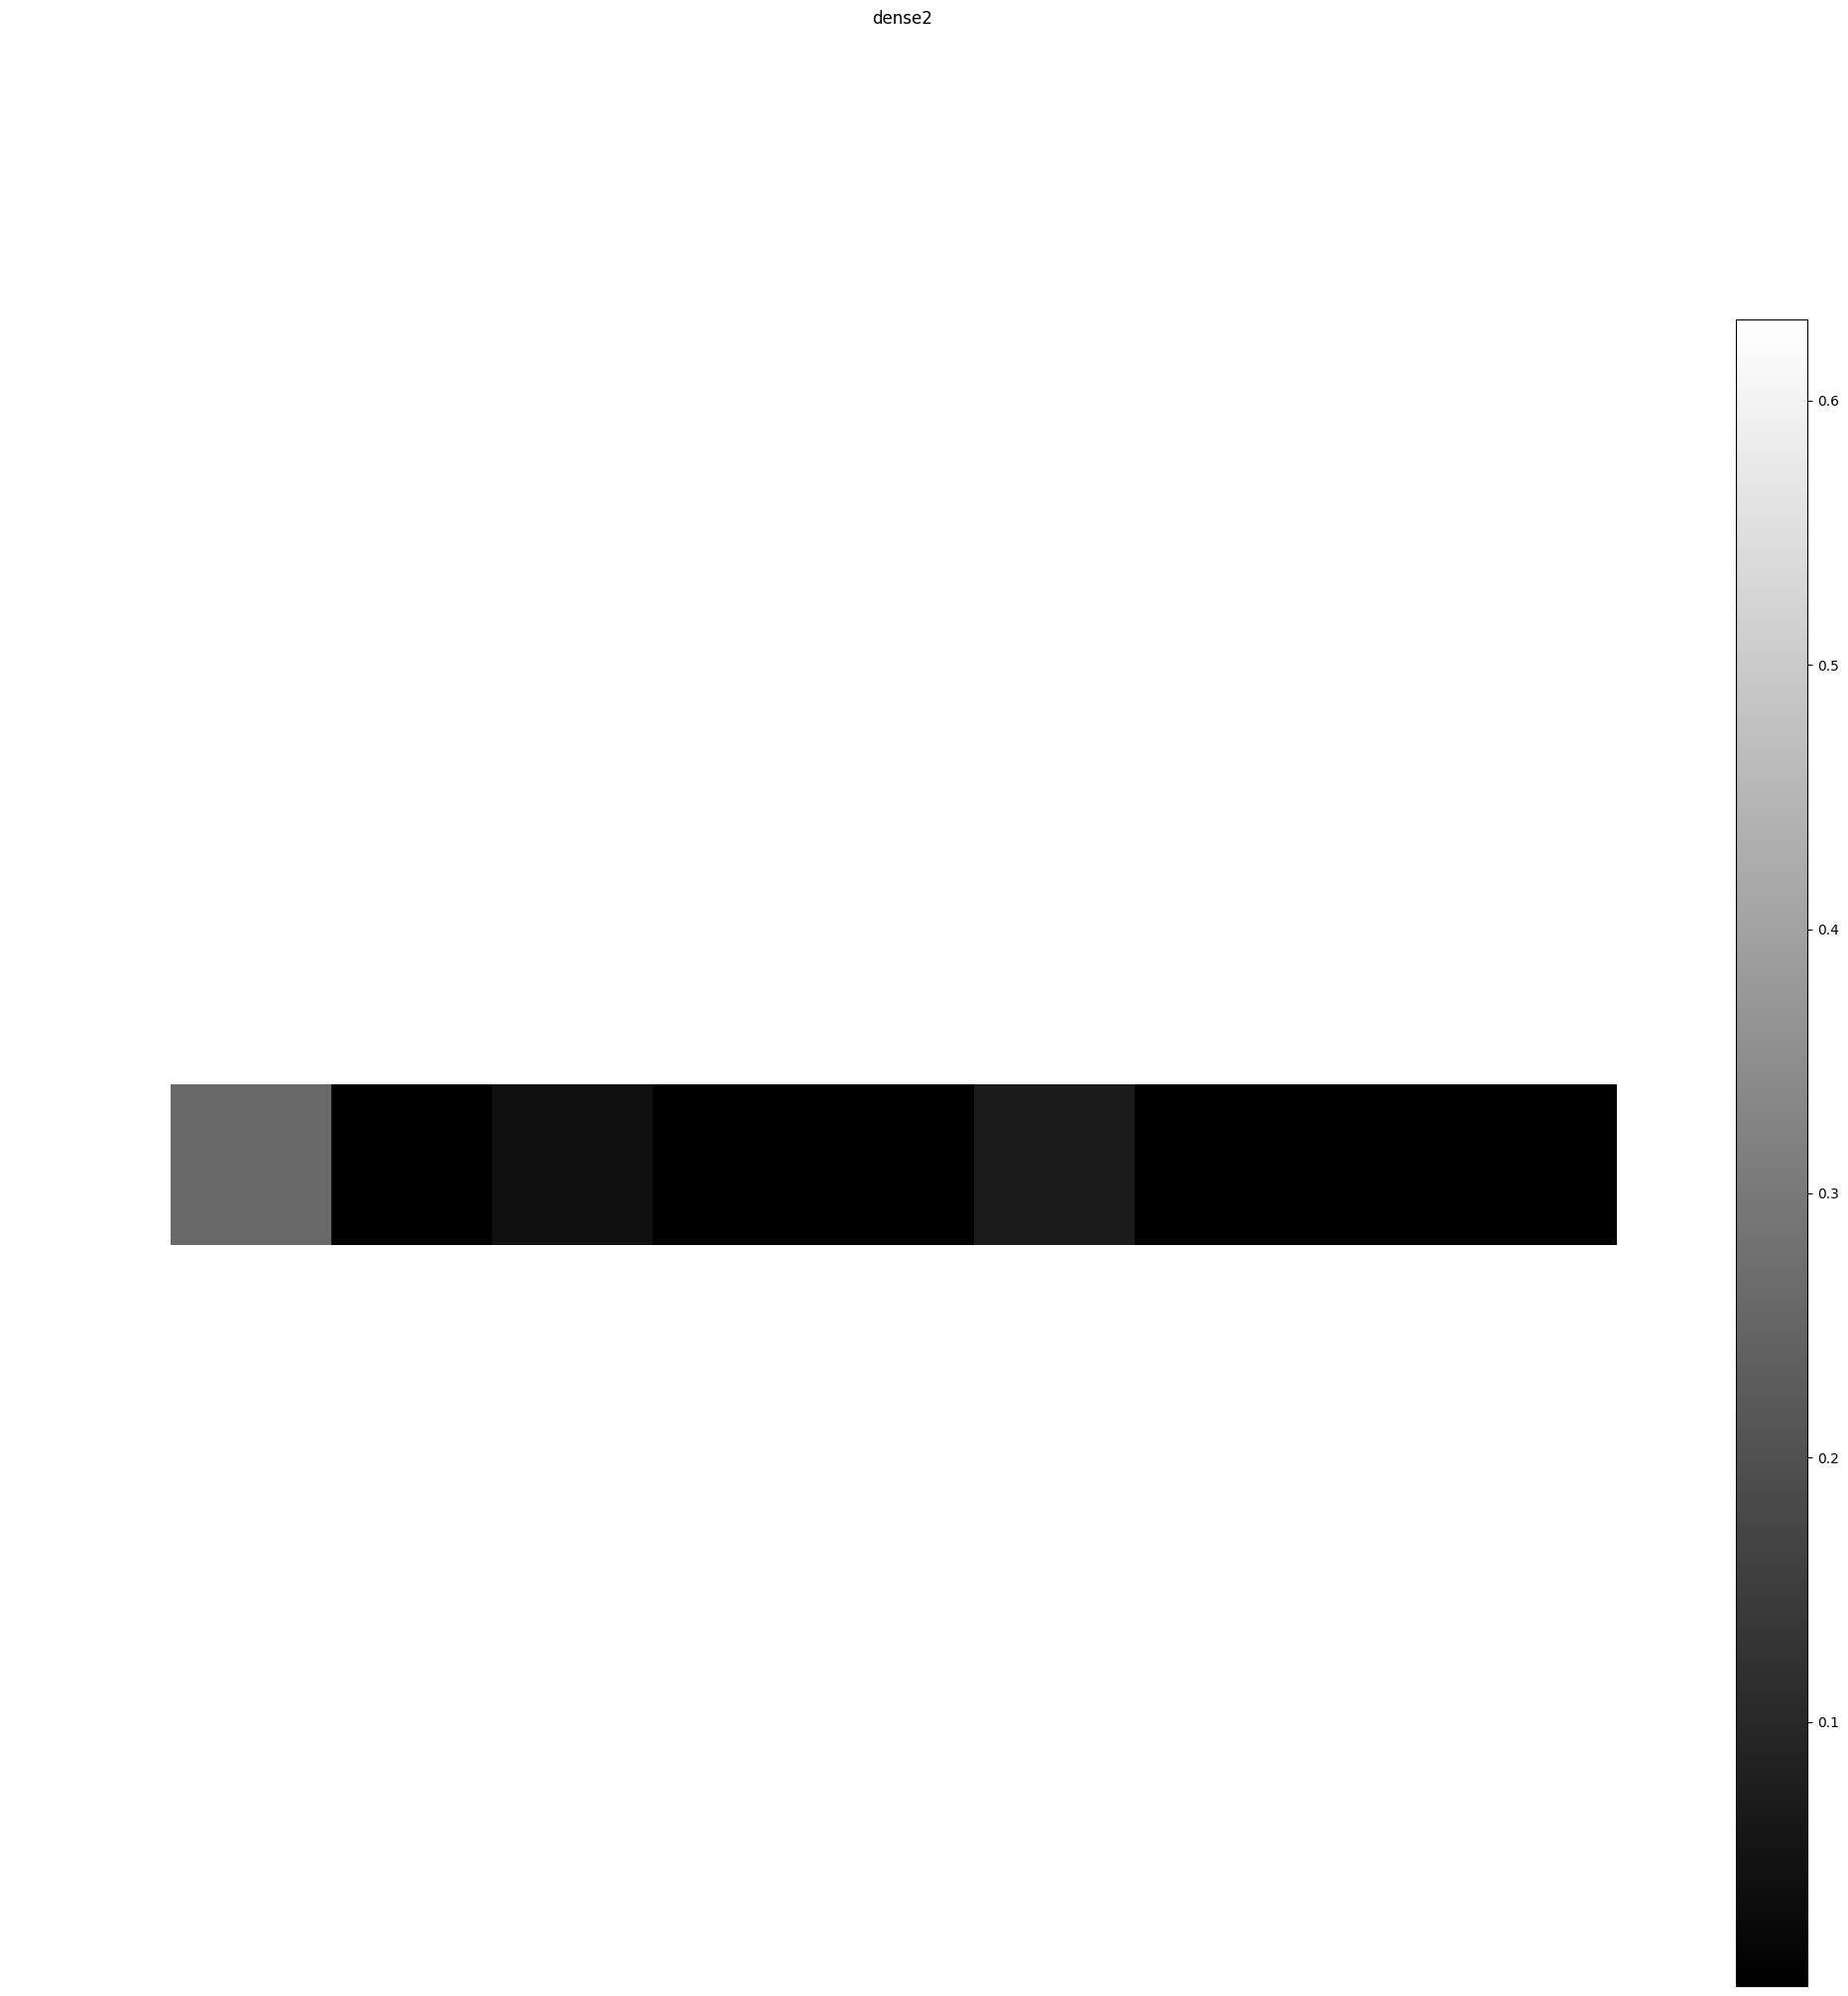

In [76]:
!pip install keract
from keract import get_activations, display_activations
layer_names=['conv1', 'conv2','dense1', 'dense2']
activations_cnn = get_activations(model, x_train[4:5], layer_names=layer_names)
#Plot the image and it's label
plt.imshow(x_train[4],cmap = plt.cm.gray_r,interpolation = "nearest")
plt.show()
print("LABEL: %s"%labels[np.argmax(y_train[4])])

#Plot the feature maps for each layer of the CNN
display_activations(activations_cnn, cmap='gray', save=False)

## Robustness to Gaussian noise


In [77]:
CNN_loss, CNN_acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(CNN_acc * 100))

noise_factor = 0.2
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


CNN_noise_loss, CNN_noise_acc = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(CNN_noise_acc * 100))

Accuracy prima dell'aggiunta di rumore: 90.78%
Accuracy dopo l'aggiunta di rumore: 66.77%


In [78]:
y_pred_noisy = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


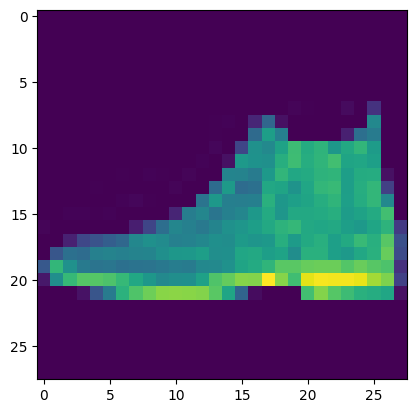

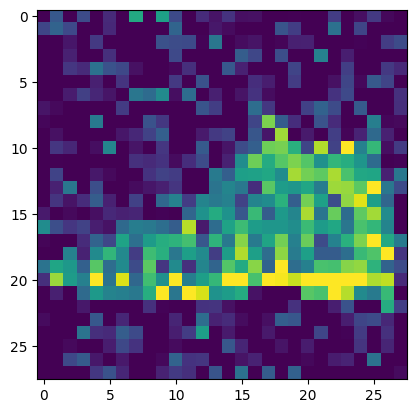

label originale Ankle Boot
label dopo noise Bag
label predetta dal modello originale Ankle Boot


In [79]:
plt.imshow(x_test[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
plt.imshow(x_test_noisy[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
print("label originale", labels[np.argmax(y_test[0])])
print("label dopo noise", labels[np.argmax(y_pred_noisy[0])])
print("label predetta dal modello originale", labels[np.argmax(y_pred[0])])

## Adversarial Attack

In [83]:
# Definisci la funzione per generare gli attacchi adversariali con il Fast Gradient Sign Method
def generate_adversarial_example(model, input_image, input_label, epsilon):
    # Imposta i gradienti calcolati sulla variabile di input
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(input_label, prediction)

    # Calcola i gradienti rispetto all'input
    gradient = tape.gradient(loss, input_image)

    # Applica il segno al gradiente e normalizzalo
    signed_grad = tf.sign(gradient)
    perturbation = epsilon * signed_grad

    # Applica la perturbazione all'immagine originale
    perturbed_image = input_image + perturbation
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)

    return perturbed_image

In [98]:
def plot_adversarial_image(x_adv):
  fig, axs = plt.subplots(1, 2)
  axs[0].imshow(x.squeeze(), cmap='viridis')
  axs[0].set_title('Original Example')
  axs[1].imshow(x_adv.numpy().squeeze(), cmap='viridis')
  axs[1].set_title('Adversarial Example')
  plt.show()

  y_pred = model.predict(x)
  y_pred_adv = model.predict(x_adv)

  print('True Label:', labels[y_true])
  print('Predicted label:', labels[np.argmax(y_pred)])
  print('Predicted label after adversarial attack:', labels[np.argmax(y_pred_adv)])

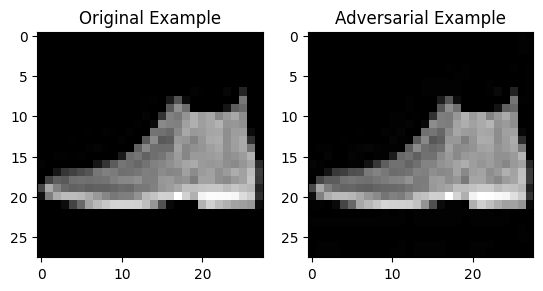

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot


In [94]:
x = x_test[0]
x = x.reshape(1, 28, 28, 1)
y_true = np.argmax(y_test[0])

# Genera un attacco adversariale con il Fast Gradient Sign Method
epsilon = 0.01
x_adv = generate_adversarial_example(model, x, y_true, epsilon)

# Mostra l'immagine originale e quella perturbata
plot_adversarial_image(x_adv)

0.02


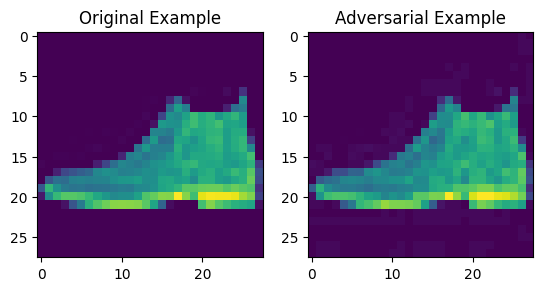

1/1 [==============================] - 0s 33ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.03


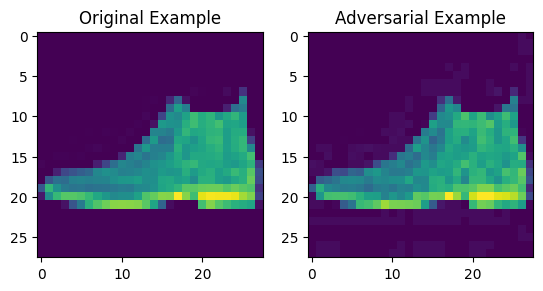

1/1 [==============================] - 0s 29ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.04


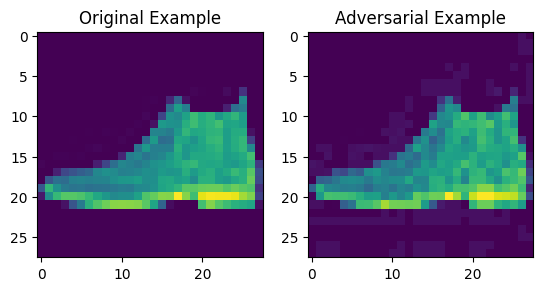

1/1 [==============================] - 0s 33ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.05


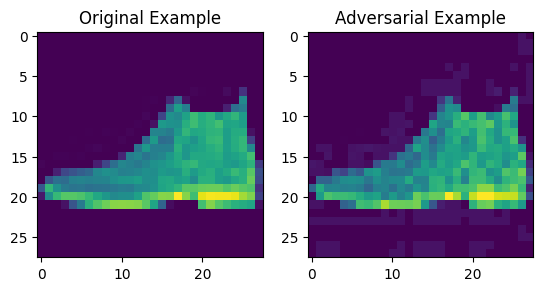

1/1 [==============================] - 0s 22ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.06


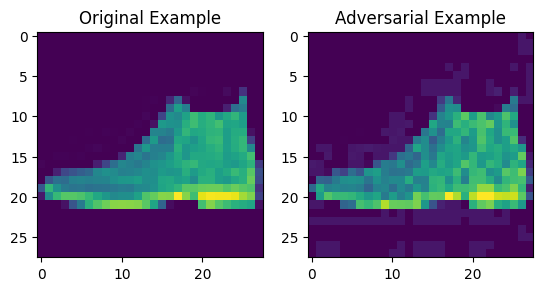

1/1 [==============================] - 0s 20ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.07


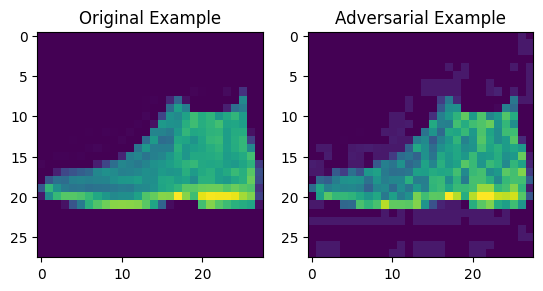

1/1 [==============================] - 0s 17ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.08


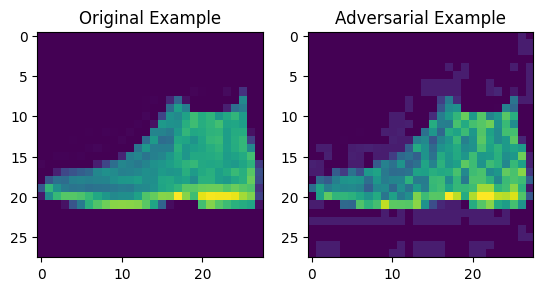

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.09


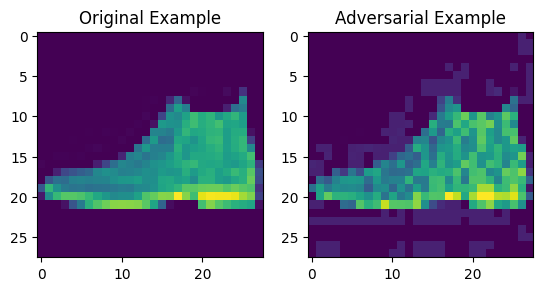

1/1 [==============================] - 0s 17ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.1


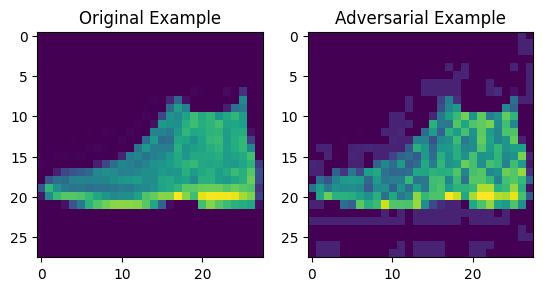

1/1 [==============================] - 0s 20ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker


In [99]:
epsilons = [0.02, 0.03, 0.04, 0.05,0.06,0.07,0.08,0.09,0.1]

for i in epsilons:
  x_adv = generate_adversarial_example(model, x, y_true, i)
  print(i)
  plot_adversarial_image(x_adv)

## CAE—Convolutional Autoencoder

In [112]:
#Function to create an autoencoder
def create_model():
  input_image = tf.keras.Input(shape=(28, 28, 1))

  #Encoding phase
  x = Conv2D(32, 3, activation='relu', padding='same', name='encoder_first_conv')(input_image)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(16, 3, activation='relu', padding='same', name='encoder_second_conv')(x)
  encoded = MaxPooling2D(2, padding='same')(x)
  #The image now is reduced to size: (None, 16, 16, 16)
  print(encoded.shape)

  #Decoding phase
  x = Conv2D(16, 3, activation='relu', padding='same',name='decoder_first_conv')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, 3, activation='relu', padding='same',name='decoder_second_conv')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='last_conv')(x)
  autoencoder = tf.keras.Model(input_image, decoded)
  autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
  return autoencoder

autoencoder_layer_names = ['encoder_first_conv','encoder_second_conv','decoder_first_conv','decoder_second_conv','last_conv']

In [113]:
autoencoder = create_model()

(None, 7, 7, 16)


In [114]:
noise_level = 0.3

#Insert noise in the training set
x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

#Insert noise in the validation set

#Force the pixel value to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)


In [115]:
#Training the encoder on noisy train set allow it to performs better on noisy images and reconstruct them in a better way 
autoencoder_results=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=False,
                validation_split=(0.2)
                )

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 8/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 9/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3835 - val_loss: 0.3828
Epoch 10/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3835 - val_loss: 0.3828

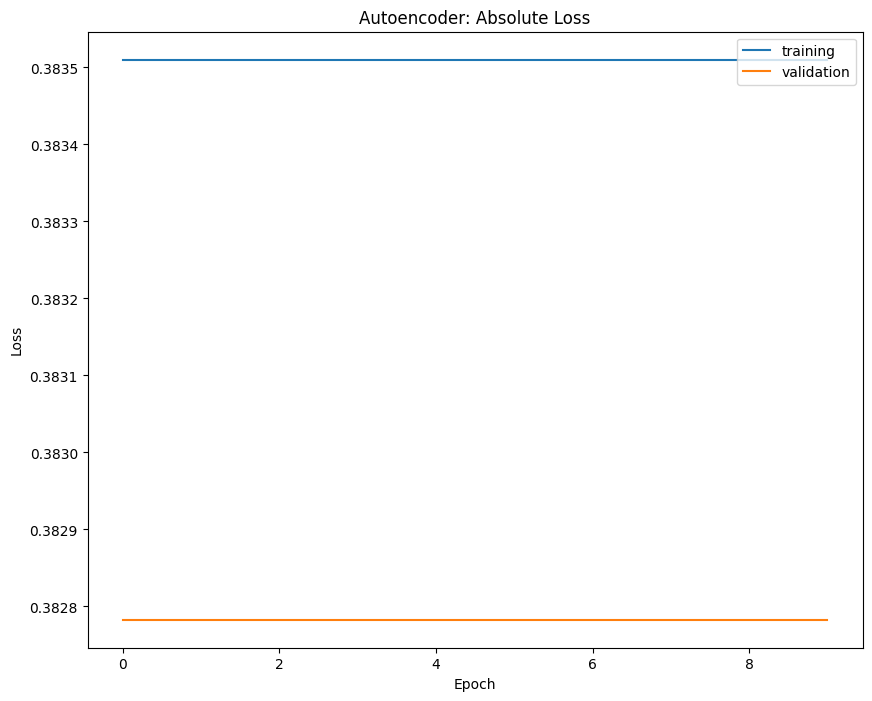

In [116]:
#Store the loss of the training and validation set
training_loss = autoencoder_results.history['loss']
validation_loss = autoencoder_results.history['val_loss']

#Loss history for training and validation
plt.figure(figsize=(10, 8))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Autoencoder: Absolute Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
#Insert Gaussian noise in the test set
X_test_noisy = X_test_norm+noise_level * np.random.normal(loc=0.0, scale=1.0, size=X_test_norm.shape)

#Force the pixel to assume values between 0 and 1
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#Perform prediction on the noisy test data 
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display Original images
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test_norm[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display perturbed images
    ax = plt.subplot(3, n, i+n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + (2*n))
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

